<a href="https://colab.research.google.com/github/gott51010/zhenXiang/blob/master/%E6%88%BF%E4%BB%B7%E9%A2%84%E6%B5%8Bkaggle%E5%85%A5%E9%97%A8%E9%A1%B9%E7%9B%AEipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import seaborn as sns       

from scipy import stats
from scipy.stats import  norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  

In [5]:
data_train = pd.read_csv("../content/sample_data/train.csv")

In [7]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [9]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

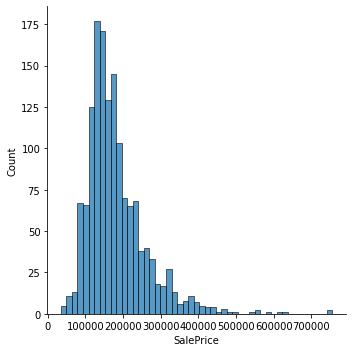

In [12]:
sns.displot(data_train['SalePrice'])
# 有一条密度曲线（KDE）


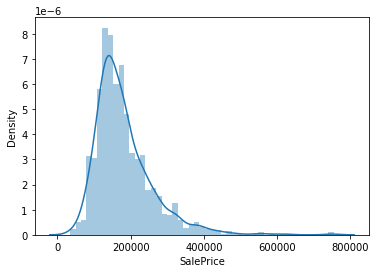

In [13]:
sns.distplot(data_train['SalePrice'])


In [15]:
#skewness and kurtosis
print("Skewness: %f" % data_train['SalePrice'].skew())
print("Kurtosis: %f" % data_train['SalePrice'].kurt())
#峰度（Kurtosis）是描述某变量所有取值分布形态陡缓程度的统计量。
#偏度（Skewness）是描述某变量取值分布对称性的统计量。

Skewness: 1.882876
Kurtosis: 6.536282


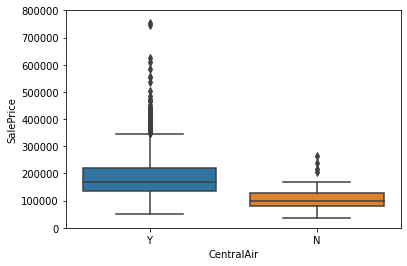

In [16]:
# CentralAir
var = 'CentralAir'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

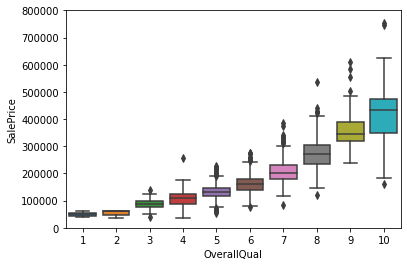

In [17]:
# OverallQual
var = 'OverallQual'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

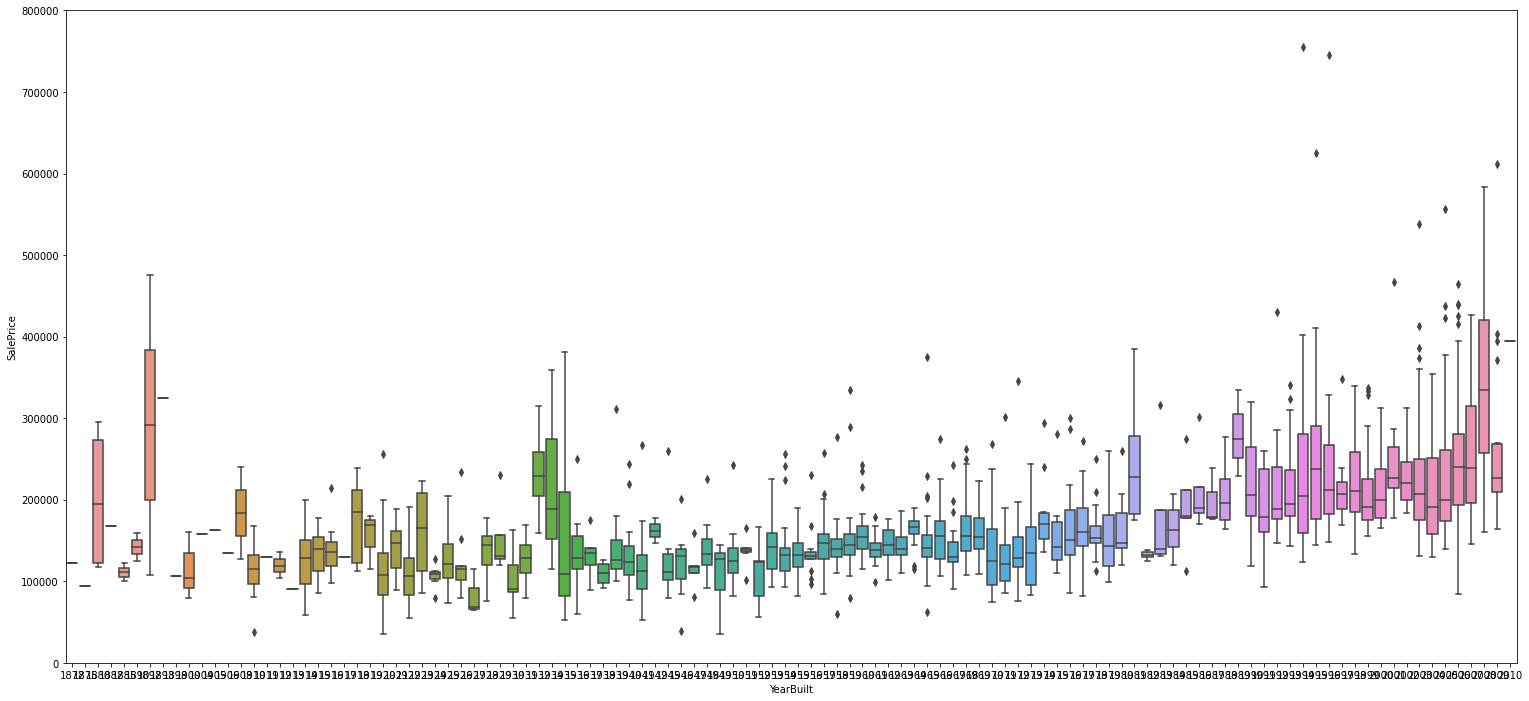

In [18]:
# YearBuilt boxplot
var = 'YearBuilt'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(26, 12))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

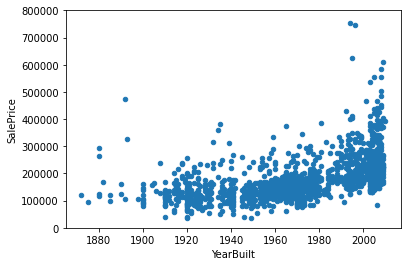

In [19]:
var = 'YearBuilt'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0, 800000))

In [ ]:
#最开始是用了箱线图绘制了房价与建造年份的关系，但是并不十分明显，所以又用点图来显示，可以很明显的看到有线性增长的趋势。

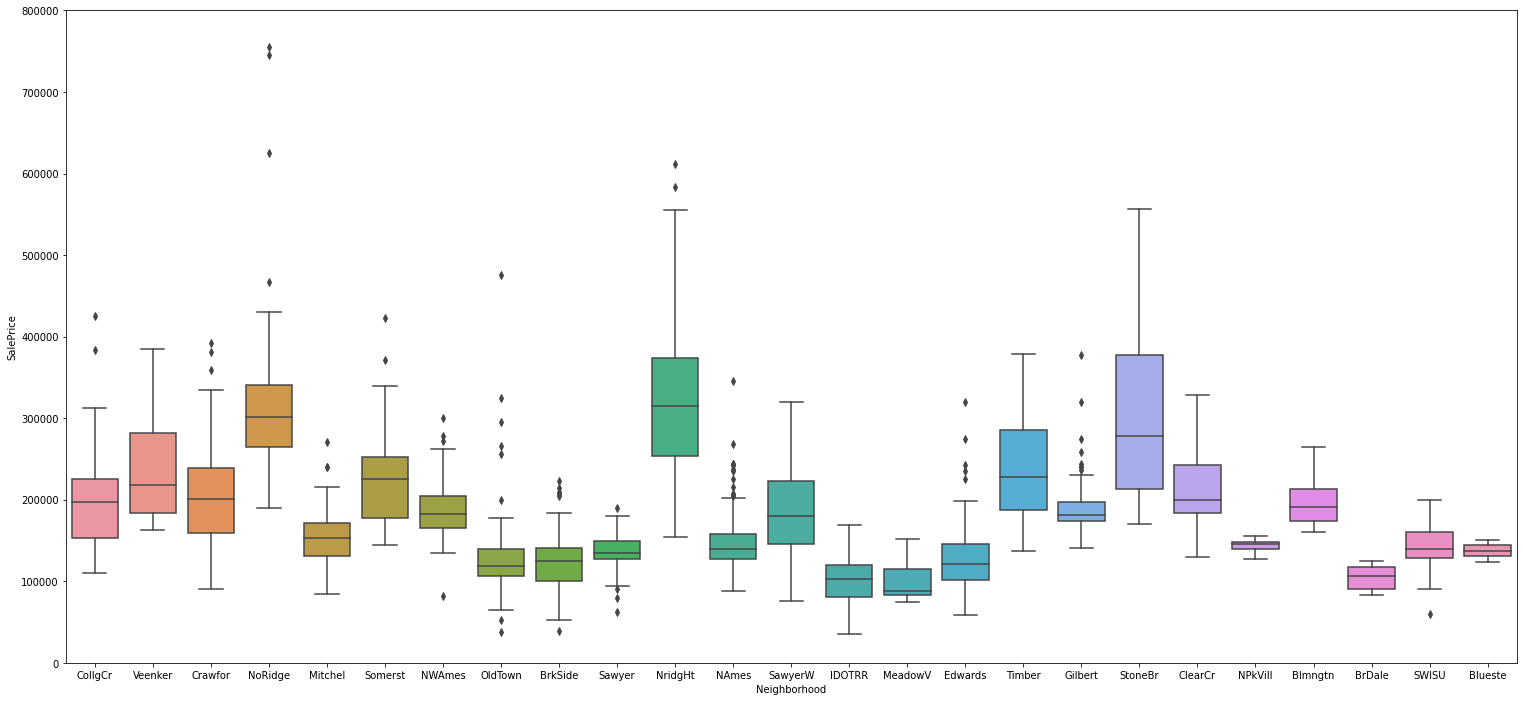

In [20]:
# Neighborhood
var = 'Neighborhood'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(26, 12))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [22]:
location = []
for x in data['Neighborhood']:
    if x not in location:
        location.append(x)
data.sort_values(['Neighborhood','SalePrice'])
nb_data = data

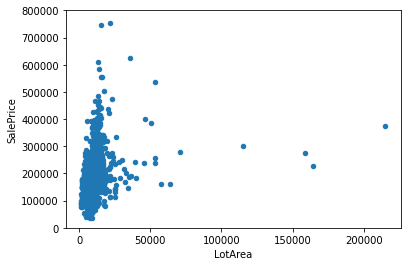

In [23]:
var  = 'LotArea'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

In [ ]:
# 好像该特征并没有什么差别

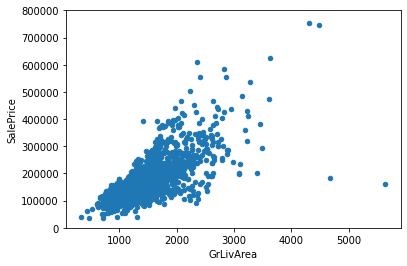

In [24]:
var  = 'GrLivArea'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

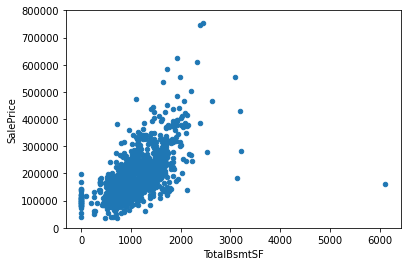

In [25]:
var  = 'TotalBsmtSF'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

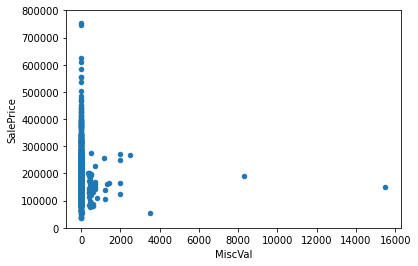

In [26]:
var  = 'MiscVal'
data = pd.concat([data_train['SalePrice'], data_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

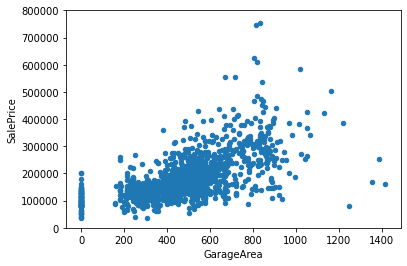

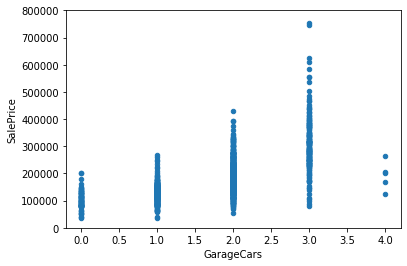

In [27]:
var  = ['GarageArea', 'GarageCars']
for index in range(2):
    data = pd.concat([data_train['SalePrice'], data_train[var[index]]], axis=1)
    data.plot.scatter(x=var[index], y='SalePrice', ylim=(0, 800000))

In [29]:
#由上面点图可以看出房价与车库面积和容纳车辆数呈现线性关系，所以入选主要特征。

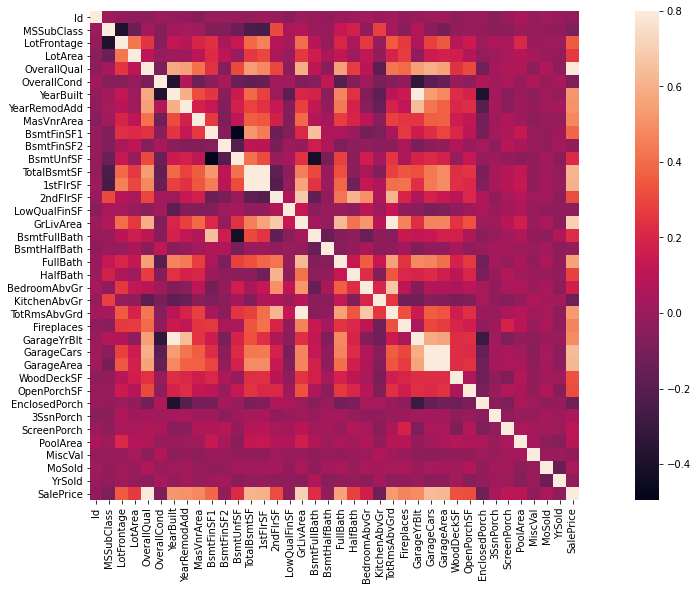

In [30]:
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [ ]:
# 像素块越红表示两者之间相关性越强，我们可以很清楚地看到与“SalePrice”相关性很强的有：

# OverallQual：总评价
# YearBuilt：建造年份
# ToatlBsmtSF：地下室面积
# 1stFlrSF：一楼面积
# GrLiveArea：生活区面积？
# FullBath：浴室？what。。。到底什么意思，知道的麻烦说一下
# TotRmsAbvGrd：总房间数（不包括浴室）
# GarageCars：车库可容纳车辆数
# GarageArea：车库面积

#还需要注意的是上面的特征中有好几个是类似的，例如GarageCars和GarageArea，ToatlBsmtSF和1stFlrSF，至于怎么取舍看下面的分析。

In [ ]:
#最后突然发现上面的矩阵只是数值型的，
# 像Neighborhood这种离散型数据则没有参与计算，
# 所以下面尝试着使用sklearn来对这些特征进行处理。

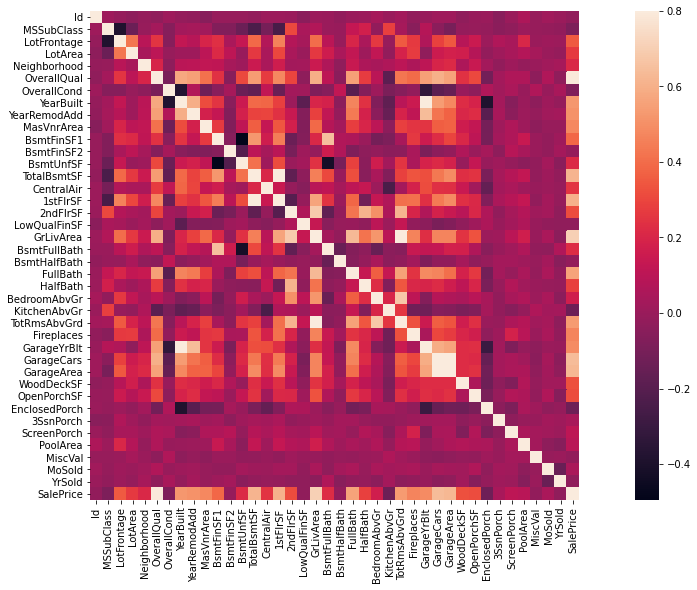

In [32]:
from sklearn import preprocessing
f_names = ['CentralAir', 'Neighborhood']
for x in f_names:
    label = preprocessing.LabelEncoder()
    data_train[x] = label.fit_transform(data_train[x])
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

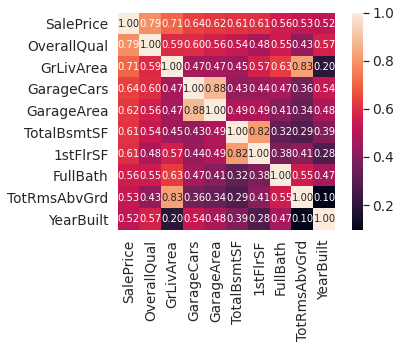

In [33]:
k  = 10 # 关系矩阵中将显示10个特征
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

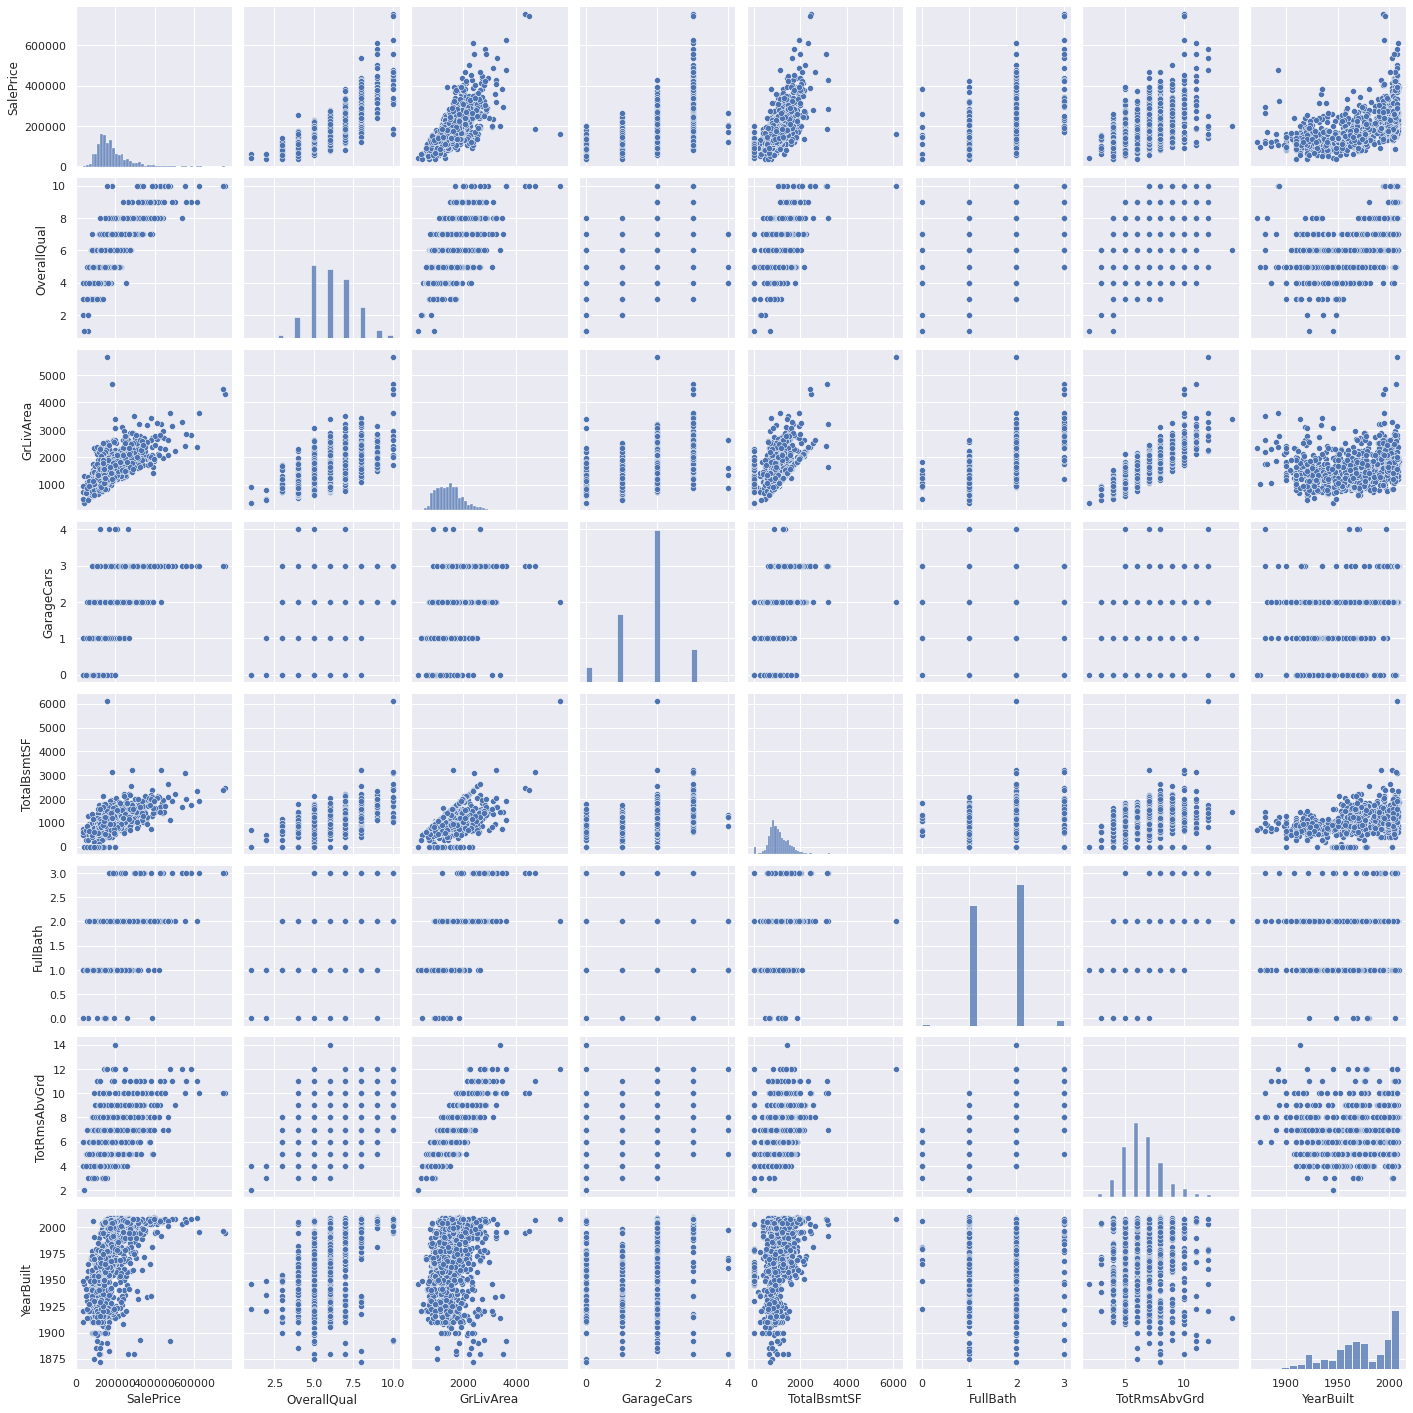

In [34]:
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(data_train[cols], size = 2.5)
plt.show()

In [37]:
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

In [38]:
# 获取数据
cols = ['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
x = data_train[cols].values
y = data_train['SalePrice'].values
x_scaled = preprocessing.StandardScaler().fit_transform(x)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))
X_train,X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.33, random_state=42)

In [39]:
clfs = {
        'svm':svm.SVR(), 
        'RandomForestRegressor':RandomForestRegressor(n_estimators=400),
        'BayesianRidge':linear_model.BayesianRidge()
       }
for clf in clfs:
    try:
        clfs[clf].fit(X_train, y_train)
        y_pred = clfs[clf].predict(X_test)
        print(clf + " cost:" + str(np.sum(y_pred-y_test)/len(y_pred)) )
    except Exception as e:
        print(clf + " Error:")
        print(str(e))

svm cost:-18.00243987076758
RandomForestRegressor cost:-2.35590198704772
BayesianRidge cost:-17.191504693239317


In [40]:
cols = ['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
x = data_train[cols].values
y = data_train['SalePrice'].values
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

clf = RandomForestRegressor(n_estimators=400)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[141195.625      305189.4375     127368.6875     173270.5
 303345.12        78591.375      192122.         152369.525
  78764.60714286 113645.545      162830.375      123030.5
  95900.25       222048.1725     187618.25       122023.75
 194443.5        132249.         119052.8225     196240.8
 164356.445      219787.75083333 169446.145      125033.10416667
 187144.9375     166496.36333333 201396.12        97608.5
 188637.75       204820.5125     111635.625      230509.8225
 179098.265      110920.125      256375.8975     141909.5
 162727.6775     206270.6025     304799.635      106597.25
 134713.         230512.45       118915.48333333 373653.8825
 139743.10833333 166033.4575     126456.41666667 115247.33333333
 432558.2675     146776.39       118576.60416667 186845.25
 126211.96479762 342178.0725     144070.52129509 242737.2075
 196232.86458333 152909.125      152463.625      103006.
  82270.89285714 140921.5        314994.2575     298888.1875
 263425.495      233338.7325     111020.54

In [41]:
y_test

array([154500, 325000, 115000, 159000, 315500,  75500, 311500, 146000,
        84500, 135500, 145000, 130000,  81000, 214000, 181000, 134500,
       183500, 135000, 118400, 226000, 155000, 210000, 173500, 129000,
       192000, 153900, 181134, 141000, 181000, 208900, 127000, 284000,
       200500, 135750, 255000, 140000, 138000, 219500, 310000,  97000,
       114500, 205000, 119500, 253293, 128500, 117500, 115000, 127000,
       451950, 144000, 119000, 196000, 115000, 287000, 144500, 260000,
       213000, 175000, 107000, 107500,  68500, 154000, 317000, 264132,
       283463, 243000, 109000, 305000,  93500, 176000, 118858, 134000,
       109008,  93500, 611657, 173000, 348000, 341000, 141000, 124900,
       118000,  67000, 113000,  91300, 149500, 133000, 266000, 190000,
       155900, 155835, 153500, 152000, 124500, 301000, 136500, 169990,
       205000, 183900, 204900, 260000, 163500, 224900, 244000, 132000,
       194000, 156500, 156000, 275000, 145000, 135000,  60000, 124000,
      

In [42]:
sum(abs(y_pred - y_test))/len(y_pred)

19863.722702754796

In [43]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# 之前训练的模型
rfr = clf

In [44]:
data_test = pd.read_csv("../content/sample_data/test.csv")

In [45]:
data_test[cols].isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      1
TotalBsmtSF     1
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

In [46]:
data_test[cols].isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      1
TotalBsmtSF     1
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

In [47]:
data_test['GarageCars'].describe()

count    1458.000000
mean        1.766118
std         0.775945
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

In [48]:
data_test['TotalBsmtSF'].describe()

count    1458.000000
mean     1046.117970
std       442.898624
min         0.000000
25%       784.000000
50%       988.000000
75%      1305.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64

In [49]:
# 不知道为什么fillna函数对data_test[cols]总是不起作用，所以只好用最笨的办法了
#data_test[ ['GarageCars'] ].fillna(1.766118, inplace=True)
#data_test[ ['TotalBsmtSF']].fillna(1046.117970, inplace=True) 
#data_test[cols].fillna(data_test[cols].mean())
#data_test[cols].isnull().sum()

cols2 = ['OverallQual','GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
cars = data_test['GarageCars'].fillna(1.766118)
bsmt = data_test['TotalBsmtSF'].fillna(1046.117970)
data_test_x = pd.concat( [data_test[cols2], cars, bsmt] ,axis=1)
data_test_x.isnull().sum()

OverallQual     0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
GarageCars      0
TotalBsmtSF     0
dtype: int64

In [50]:
x = data_test_x.values
y_te_pred = rfr.predict(x)
print(y_te_pred)

print(y_te_pred.shape)
print(x.shape)

[ 93787.375  106604.1575 136462.62   ... 100214.52    93910.25
 174002.945 ]
(1459,)
(1459, 7)


In [51]:
data_test_x

,OverallQual,GrLivArea,FullBath,TotRmsAbvGrd,YearBuilt,GarageCars,TotalBsmtSF
0,5,896,1,5,1961,1.0,882.0
1,6,1329,1,6,1958,1.0,1329.0
2,5,1629,2,6,1997,2.0,928.0
3,6,1604,2,7,1998,2.0,926.0
4,8,1280,2,5,1992,2.0,1280.0
...,...,...,...,...,...,...,...
1454,4,1092,1,5,1970,0.0,546.0
1455,4,1092,1,6,1970,1.0,546.0
1456,5,1224,1,7,1960,2.0,1224.0
1457,5,970,1,6,1992,0.0,912.0


In [52]:
prediction = pd.DataFrame(y_te_pred, columns=['SalePrice'])
result = pd.concat([ data_test['Id'], prediction], axis=1)
# result = result.drop(resultlt.columns[0], 1)
result.columns

Index(['Id', 'SalePrice'], dtype='object')

In [53]:
result

,Id,SalePrice
0,1461,93787.3750
1,1462,106604.1575
2,1463,136462.6200
3,1464,161206.1950
4,1465,172924.5000
...,...,...
1454,2915,89726.0000
1455,2916,89726.0000
1456,2917,100214.5200
1457,2918,93910.2500
